# Importing libraries for VGG16

In [28]:
'''in this section we have imported various libraries nwhich we are going to use in our model like 
numpy, pandas, seaborn, matplotlib etc'''
import cv2 # this library is used to solve computer vision problems
import pickle # this is used for serializing and de-serializing Python object structures
import seaborn as sns #imported for heat map
import matplotlib.image as mpimg # used for loading , rescaling, and displaying images

import keras ## it is used for  for developing and evaluating deep learning models
import tensorflow ## it is used for fast numerical computing

from tensorflow.keras.models import Model ##TensorFlow neural networks by specifying the attributes, functions, and layers we want
from tensorflow.keras.utils import plot_model ##Converts a Keras model to dot format and save to a file
from tensorflow.keras.models import Sequential # Used for implementing simple layer-by-layer architectures without multiple inputs, multiple outputs, or layer branches
from tensorflow.keras.applications import VGG16 #importing vgg19 model
from tensorflow.keras.callbacks import EarlyStopping #it is used to specify an arbitrary large number of training epochs and stop training once the model performance stops improving on a hold out validation datase
from tensorflow.keras.preprocessing.image import ImageDataGenerator #Generate batches of tensor image data with real-time data augmentation
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten,Dropout,BatchNormalization,Activation

from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,recall_score,precision_score,f1_score # values
import os
import matplotlib.pyplot as plt
import numpy as np

# Defining data Paths

In [29]:
'''in this section we have imported our training,testing, validation data from our local source in our laptop'''
train_path = r"C:\Users\Rahul Choubey\Documents\Dataset\Rishita Dataset\archive (56)\Dataset_BUSI_with_GT\Train" # importing training path
test_path = r"C:\Users\Rahul Choubey\Documents\Dataset\Rishita Dataset\archive (56)\Dataset_BUSI_with_GT\Test" # importing testing path
val_path = r"C:\Users\Rahul Choubey\Documents\Dataset\Rishita Dataset\archive (56)\Dataset_BUSI_with_GT\Test" # importing validation path

benign


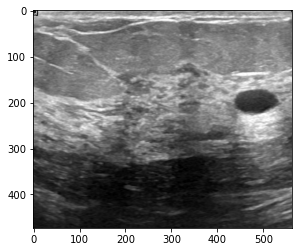

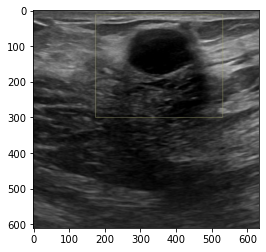

malignant


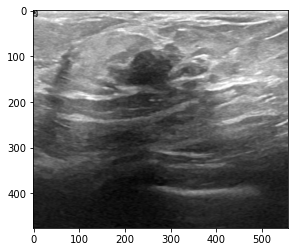

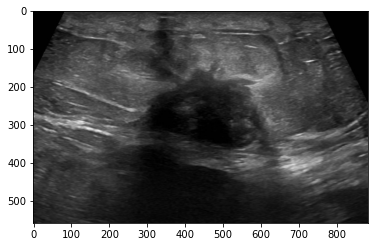

In [30]:
'''in this section we showed two images of each categories of our dataset '''
for folder in os.listdir(train_path):
    sub_path = train_path + "/" + folder # accessing the images in the training folder 
    print(folder) # print the folder name
    for i in range(2): # print 2 images of each folder
        temp_path = os.listdir(sub_path)[i] # defining the temporary path
        temp_path = sub_path + "/" + temp_path
        img = mpimg.imread(temp_path) # function to read the path of the image 
        implot = plt.imshow(img) 
        plt.show() #shows the image

# Converting image to pixels

In [31]:
'''in this section we have converted our image to pixels '''
#function to convert image to pixels
def imagearray(path,size):
    data = []
    for folder in os.listdir(path): # list directory 
        sub_path = path+"/"+folder # declaring sub path which includes the folder and the image path
    
    
        for img in os.listdir(sub_path):
            image_path = sub_path+"/"+img # defining image path
            img_arr = cv2.imread(image_path) # function to read the image path
            img_arr = cv2.resize(img_arr,size) # resizing th eimage array
            data.append(img_arr) # append the data with image array
    return data  # return the data value

In [32]:
''''in this section we have declared the size of the image to resize in 250*250 size'''
#declaring the size
size = (250,250)

In [33]:
'''in this section we have converted our image into image array of training,testing,validation'''
train = imagearray(train_path,size) # defining the train image array
test = imagearray(test_path,size) # defining the test image array
val = imagearray(val_path,size) # defining the validation image array

# Normalization

In [34]:
'''in this section we have normalized our images into numpy array of each training, testing, validation data'''
#converting images into numpy array
x_train = np.array(train) # converting training data into numpy array
x_test = np.array(test) # converting testing data into numpy array
x_val = np.array(val) # converting validation data into numpy array

In [35]:
x_train = x_train/255 # setting the numpy array size in 255 for training data
x_test = x_test/255 # setting the numpy array size in 255 for testing data
x_val = x_val/255 # setting the numpy array size in 255 for validation data

# Defining Target Variables

In [36]:
'''in this section we have defined the target variables which we have to predict in our model'''
#function to define target variables
def data_class(data_path,size,class_mode):
    datagen = ImageDataGenerator(rescale = 1./255) # rescaling the image in 255 array size
    classes = datagen.flow_from_directory(data_path,   
                                         target_size = size,
                                         batch_size = 32,
                                         class_mode = class_mode) # defining the target variables with some parameters
    return classes # return the class value

In [37]:
'''in this section we have to split our data into train_class,test_class,validation_class'''
train_class = data_class(train_path,size,"sparse") # defining the train class 
test_class = data_class(test_path,size,"sparse") # defining the test class
val_class = data_class(val_path,size,"sparse") # defining the validation class

Found 497 images belonging to 2 classes.
Found 148 images belonging to 2 classes.
Found 148 images belonging to 2 classes.


In [38]:
'''in this section we have declared target variables of training, testing, validation'''
y_train = train_class.classes # defining the dependent training class
y_test = test_class.classes # defining the dependent testing class
y_val = val_class.classes # defining the dependent validation class

In [39]:
train_class.classes # checking the 0 and 1 number of values in training data

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [40]:
train_class.class_indices # checking the 2 categories of classification in training data

{'benign': 0, 'malignant': 1}

In [41]:
'''in this section we have printed the shape of the y_train and y_test'''
print("y_train_shape",y_train.shape,"y_test_shape",y_test.shape)
# printing the shape of the training and the testing dependent data

y_train_shape (497,) y_test_shape (148,)


# VGG19 Model

In [42]:
'''in this section we have initiated the vgg19 model that we have to apply on our dataset'''
#initializing the model
vgg = VGG16(input_shape = (250,250,3),weights = "imagenet", include_top = False)

58900480/58889256 [==============================] - 10s 0us/step


In [43]:
for layer in vgg.layers:
    layer.trainable = False # making the trainable layer in vgg 19 as false.

In [44]:
x = Flatten()(vgg.output)  # Flatten the image array of the independent images
prediction = Dense(3,activation = "softmax")(x) # using the activation function as softmax 

In [45]:
'''in this section we have printed the summary of the resnet model'''
#summary of the model
model = Model(inputs = vgg.input, outputs = prediction) # summary of the model with predicted values
model.summary() # function to show the summary

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 250, 250, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 250, 250, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 125, 125, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 125, 125, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 125, 125, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 62, 62, 128)       0     

In [46]:
'''in this section we have defined the early stopping'''
#initializing the earlystop
early_stop = EarlyStopping(mode = "min",verbose = 1, patience = 5) # defining the early stop

In [47]:
'''in this section we have compiled the resnet model on our dataset'''
#compiling the model
model.compile(loss = "sparse_categorical_crossentropy", 
             optimizer = "adam",
             metrics = ["accuracy"]) # function to compile the with adam optimizer with accuracy matrix

In [48]:
'''in this section we have fitted our resnet model on training data of our dataset'''
#fitting the model
history = model.fit(x_train,y_train,
         epochs = 10,
          validation_data = (x_val,y_val)
          ,callbacks = [early_stop],
         batch_size = 20,
         shuffle = True,steps_per_epoch = 5)

Epoch 1/10
5/5 [==============================] - 17s 4s/step - loss: 1.1307 - accuracy: 0.4300 - val_loss: 1.0798 - val_accuracy: 0.3243
Epoch 2/10
5/5 [==============================] - 16s 4s/step - loss: 0.8469 - accuracy: 0.5500 - val_loss: 0.8410 - val_accuracy: 0.6757
Epoch 3/10
5/5 [==============================] - 16s 4s/step - loss: 0.4054 - accuracy: 0.8000 - val_loss: 0.5127 - val_accuracy: 0.7568
Epoch 4/10
5/5 [==============================] - 16s 4s/step - loss: 0.4451 - accuracy: 0.8200 - val_loss: 0.5348 - val_accuracy: 0.7568
Epoch 5/10
5/5 [==============================] - 16s 4s/step - loss: 0.4751 - accuracy: 0.7938 - val_loss: 0.4918 - val_accuracy: 0.7568
Epoch 6/10
5/5 [==============================] - 16s 4s/step - loss: 0.3791 - accuracy: 0.8100 - val_loss: 0.4478 - val_accuracy: 0.7905
Epoch 7/10
5/5 [==============================] - 17s 4s/step - loss: 0.2836 - accuracy: 0.9400 - val_loss: 0.3752 - val_accuracy: 0.8514
Epoch 8/10
5/5 [==================

In [50]:
'''in this section we have evaluated the training accuracy of the resnet model'''
model.evaluate(x_train,y_train,batch_size = 32) # evaluate model showing training accuracy and loss 

16/16 [==============================] - 33s 2s/step - loss: 0.2095 - accuracy: 0.9356


[0.209457665681839, 0.9356136918067932]

In [51]:
'''in this section we have evaluated the testing accuracy of the resnet model'''
model.evaluate(x_test, y_test,batch_size = 32)# evaluate model showing val accuracy and loss 

5/5 [==============================] - 10s 2s/step - loss: 0.3252 - accuracy: 0.8784


[0.32519692182540894, 0.8783783912658691]

In [52]:
'''in this section we have evaluated the validation accuracy of the resnet model'''
model.evaluate(x_val, y_val,batch_size = 32)# evaluate model showing testing accuracy and loss 

5/5 [==============================] - 10s 2s/step - loss: 0.3252 - accuracy: 0.8784


[0.32519692182540894, 0.8783783912658691]

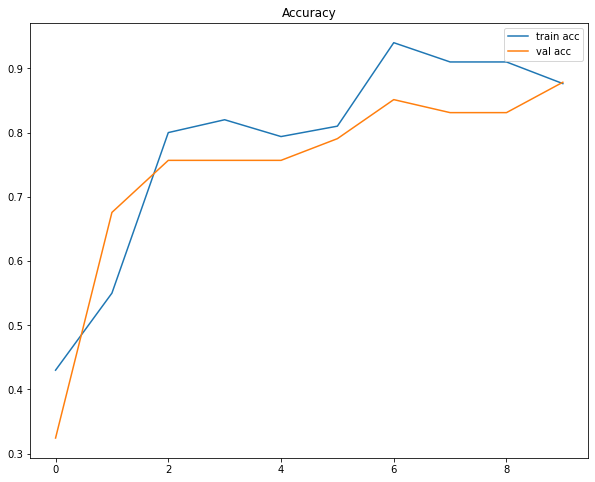

In [53]:
'''in this section we have plotted the roc curve of the testing data'''
plt.figure(figsize = (10,8))
plt.plot(history.history['accuracy'],label = 'train acc')
plt.plot(history.history['val_accuracy'],label = 'val acc')
plt.legend()
plt.title('Accuracy')
plt.show()

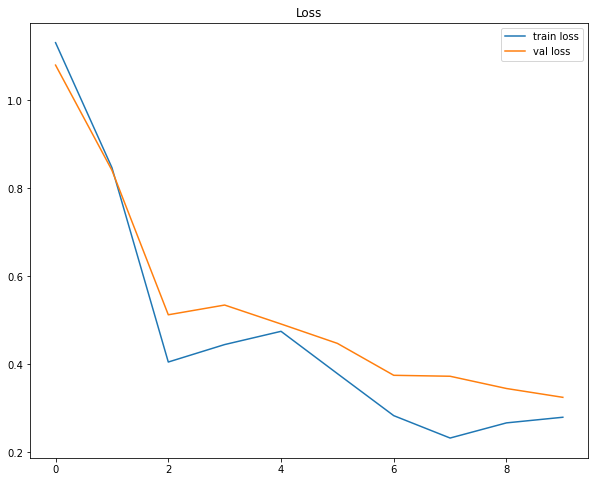

In [54]:
'''in this section we have plotted the roc curve of the training data'''
plt.figure(figsize = (10,8))
plt.plot(history.history['loss'],label = 'train loss')
plt.plot(history.history['val_loss'],label = 'val loss')
plt.legend()
plt.title('Loss')
plt.show()

In [55]:
'''in this section we have predicted the x_test that how much it is matching same value with y_test'''
#Making prediction
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)

In [56]:
'''in this section we have plotted the classification report of testing data'''
print(classification_report(y_pred,y_test))

import warnings
warnings.simplefilter("ignore", UserWarning)


              precision    recall  f1-score   support

           0       0.93      0.89      0.91       104
           1       0.77      0.84      0.80        44

    accuracy                           0.88       148
   macro avg       0.85      0.87      0.86       148
weighted avg       0.88      0.88      0.88       148



[Text(0, 0.5, 'benign'), Text(0, 1.5, 'malignant')]

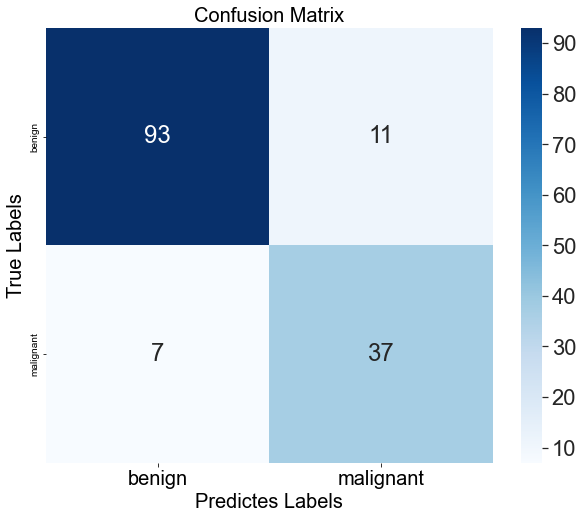

In [57]:
'''in this section we have plotted the confusion matrix of the testing data'''
cm = confusion_matrix(y_pred,y_test)

plt.figure(figsize = (10,8))
ax = plt.subplot()
sns.set(font_scale = 2.0)
sns.heatmap(cm,annot = True,fmt = 'g',cmap = "Blues", ax = ax);

# Labels, title and ticks
ax.set_xlabel("Predictes Labels", fontsize = 20); ax.set_ylabel('True Labels', fontsize = 20);
ax.set_title("Confusion Matrix", fontsize = 20);
ax.xaxis.set_ticklabels(["benign","malignant"], fontsize = 20); ax.yaxis.set_ticklabels(["benign","malignant"])

In [58]:
'''in this section we have plotted the roc of the testing data'''
def plot_roc(model, x_test, y_test):
    # calculate the fpr and tpr for all thresholds of the classification
    probabilities = model.predict_proba(np.array(x_test))
    predictions = probabilities[:, 1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('rahul')
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [59]:
'''in this section we have printed the f1 score, precision ,recall'''
print("F1 score is: ",f1_score(y_test,y_pred,average = "micro"))
print("Recall value is: ",recall_score(y_test,y_pred,average = "weighted"))

import warnings
warnings.simplefilter("ignore", UserWarning)
print("Precision Score is: ",precision_score(y_test,y_pred,average = "micro"))

F1 score is:  0.8783783783783784
Recall value is:  0.8783783783783784
Precision Score is:  0.8783783783783784


In [60]:
'''in this section we have predicted the x_train'''
#Making training prediction
y_pred_train=model.predict(x_train)
y_pred_train=np.argmax(y_pred_train,axis=1)

In [61]:
'''in this section we have plotted the classification report of the training data'''
print(classification_report(y_pred_train,y_train))

import warnings
warnings.simplefilter("ignore", UserWarning)

              precision    recall  f1-score   support

           0       0.98      0.93      0.95       357
           1       0.84      0.96      0.89       140

    accuracy                           0.94       497
   macro avg       0.91      0.94      0.92       497
weighted avg       0.94      0.94      0.94       497



[Text(0, 0.5, 'benign'), Text(0, 1.5, 'malignant')]

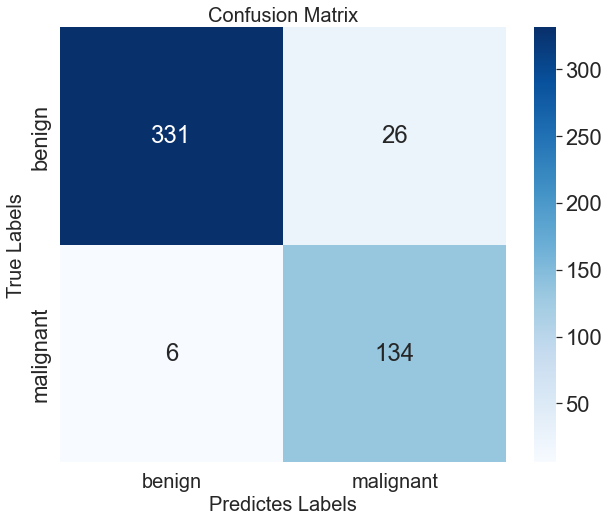

In [62]:
'''in this section we have plotted the confusion matrix of training data'''
cm = confusion_matrix(y_pred_train,y_train)

plt.figure(figsize = (10,8))
ax = plt.subplot()
sns.set(font_scale = 2.0)
sns.heatmap(cm,annot = True,fmt = 'g',cmap = "Blues", ax = ax);

# Labels, title and ticks
ax.set_xlabel("Predictes Labels", fontsize = 20); ax.set_ylabel('True Labels', fontsize = 20);
ax.set_title("Confusion Matrix", fontsize = 20);
ax.xaxis.set_ticklabels(["benign","malignant"], fontsize = 20); ax.yaxis.set_ticklabels(["benign","malignant"])

In [63]:
'''in this section we have plotted the f1_score, precision ,recall values of training data'''
print("F1 score is: ",f1_score(y_train,y_pred_train,average = "micro"))
print("Recall value is: ",recall_score(y_train,y_pred_train,average = "weighted"))

import warnings
warnings.simplefilter("ignore", UserWarning)
print("Precision Score is: ",precision_score(y_train,y_pred_train,average = "micro"))

F1 score is:  0.9356136820925554
Recall value is:  0.9356136820925554
Precision Score is:  0.9356136820925554
